# 📌 Transform: Primeiro Tratar

[Clique para acessar os dados](https://docs.google.com/spreadsheets/d/1YQhDNSt1sOrzq6AKxyYG6wzRAvM-M7l7jJRIHunNB88/copy?gid=1190375422#gid=1190375422)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_receitas = pd.read_csv('/content/Cópia de Dados - TCC - Planilhas - Receitas.csv')

## 2️⃣ Ao nível de linhas

### 💡 Substituir linhas

Em planilhas, a alteração é com mouse, basta clicar (low-code, lembra da nossa aula de ferramentas?) Aqui é com o teclado high-code)!

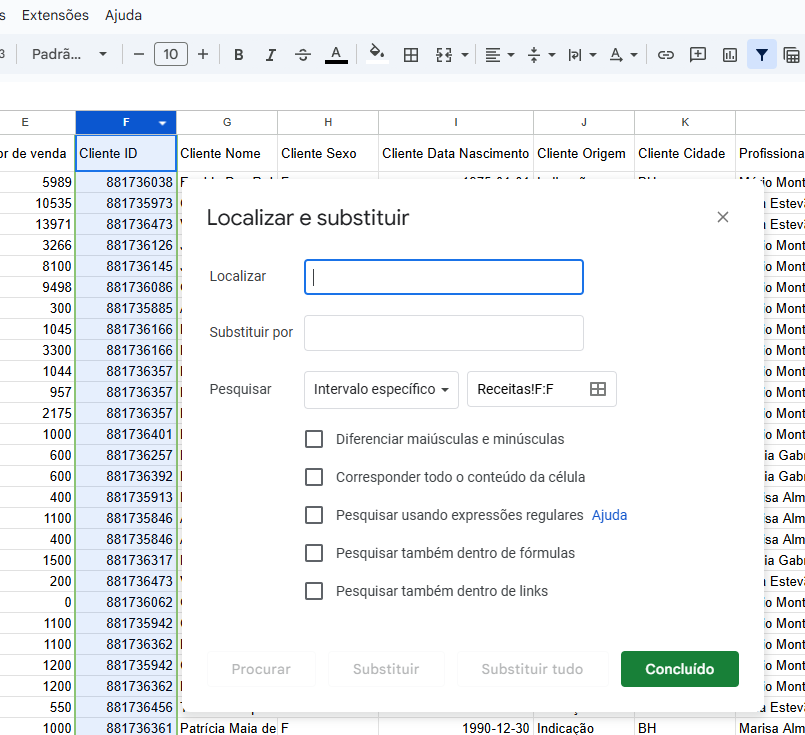

🔹 Com value_counts() podemos ver que a coluna Sexo está com os valores meio estranhos, veja só

In [ ]:
df_receitas['cliente_sexo'].value_counts(dropna=False)

,count
cliente_sexo,
F,536
Feminino,408
NaN,192
M,92
Masculino,14


🔹 Você pode usar a função np.where() para substituir onde tem F por Feminino. É uma boa escolha de função quando queremos substituir valores com base em uma única condição

In [ ]:
df_receitas["cliente_sexo"].value_counts()

,count
cliente_sexo,
F,536
Feminino,408
M,92
Masculino,14


In [ ]:
df_receitas["cliente_sexo"] = np.where(df_receitas["cliente_sexo"] == 'F', "Feminino", df_receitas["cliente_sexo"])

🔹 No entanto, aqui precisamos substituir dois valores, porque também M precisa ser substituído por Masculino. Nesse caso, é possível utilizar np.select()

In [ ]:
# Definir condições
condicoes = [df_receitas["cliente_sexo"] == "F",
             df_receitas["cliente_sexo"] == "M"
             ]

# Definir os valores correspondentes para cada condição. Tem que ter um valor para cada condição
valores = ["Feminino", "Masculino"]

# Aplicar a substituição com np.select() com um valor default
df_receitas["cliente_sexo"] = np.select(condicoes, valores, default= df_receitas["cliente_sexo"])


🔹 Só que em programação, existem vários caminhos! Você ainda pode utilizar funções como replace()

In [ ]:
# Substituir diretamente valores específicos

df_receitas["cliente_sexo"] = df_receitas["cliente_sexo"].replace({"F": "Feminino", "M": "Masculino"})


🔹 Ou a função map(). Só tome o cuidado, pois se um valor não estiver no dicionário, ele será convertido para NaN.

In [ ]:
# Criar um dicionário de mapeamento e aplicar com map().

mapa_sexo = {"F": "Feminino", "M": "Masculino", "Feminino": "Feminino", "Masculino": "Masculino"}

df_receitas["cliente_sexo"] = df_receitas["cliente_sexo"].map(mapa_sexo)

🔹 Por fim, utilize a função apply(), para aplicar uma função customizada por você!

In [ ]:
# Função personalizada para padronizar a coluna

def padronizar_sexo(valor):
    if valor in ["F", "Feminino"]:
        return "Feminino"
    elif valor in ["M", "Masculino"]:
        return "Masculino"
    return valor #retorna o valor original caso não seja alterado

# Aplicando a função com apply()
df_receitas["cliente_sexo"] = df_receitas["cliente_sexo"].apply(padronizar_sexo)


### 💡 Imputar linhas

🔹 A gente poderia ter utilizado a substituição para substituir um valor nulo (NaN).

In [ ]:
# Substituir valores nulos por "Não informado"

df_receitas["cliente_sexo"] = np.where(df_receitas["cliente_sexo"].isna(), "Não informado", df_receitas["cliente_sexo"])

🔹 Mas também existe uma função específica para substituição de Nulos

In [ ]:
# Preenchendo nulos com a moda (valor mais frequente) da coluna

df_receitas["cliente_sexo"] = df_receitas["cliente_sexo"].fillna("Não informado")

🔹 A função fillna tem vários parâmetros interessantes, veja a documentação

[Clique para ver a documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

### 💡 Filtrar linhas

Em planilhas, a alteração é com mouse, basta clicar (low-code, lembra da nossa aula de ferramentas?) Aqui é com o teclado high-code)!

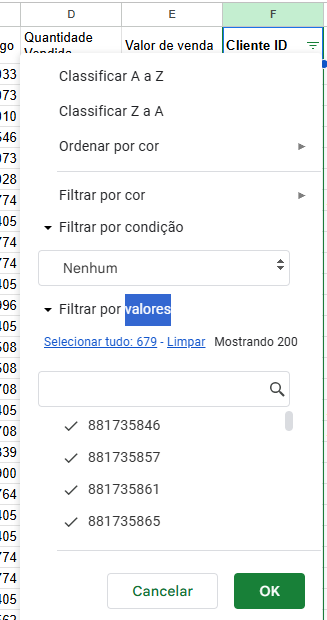

🔹 Mas e se a gente quiser filtrar algumas linhas? Podemos utilizar algo que "prende" apenas algumas linhas. Repare que ao invés de parêntese utilizamos colchetes. Isso porque loc é um indexador, não uma função. Isso significa que ele é usado para acessar elementos dentro do DataFrame, de forma semelhante a como acessamos elementos de listas ou dicionários em Python.

In [ ]:
df_receitas.loc[df_receitas["cliente_sexo"] == "Feminino"].head(3)

,atendimento_id,data_lancamento,receita_codigo,venda_quantidade,venda_valor,cliente_id,cliente_sexo,cliente_nascimento_data,cliente_origem,profissional_especialidade,pagamento_data,pagamento_forma
0,44487881736038,2021-10-18,879941033,1,5989.0,e\aez\eae,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC
1,44487881736038,2021-10-18,879941033,1,5989.0,881736038aeeaeeaaeea,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC
2,44487881736038,2021-10-18,879941033,1,5989.0,881736038aeeae,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC


Ou de forma posicional, retorna as primeiras 5 linhas, Porque o index máximo é 4? Porque em Python a indexação começa no 0.

In [ ]:
df_receitas.iloc[0:5]

,atendimento_id,receita_codigo,venda_quantidade,venda_valor,cliente_id,cliente_sexo,cliente_nascimento_data,cliente_origem,profissional_especialidade,pagamento_data,pagamento_forma
0,2021-10-18,879941033,1,5989.0,e\aez\eae,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC
1,2021-10-18,879941033,1,5989.0,881736038aeeaeeaaeea,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC
2,2021-10-18,879941033,1,5989.0,881736038aeeae,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC
3,2021-10-18,879941033,1,5989.0,881736038,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC
4,2021-11-08,879941073,1,10535.0,881735973,Feminino,1972-06-22,Indicação,Cirurgia Plástica,2021-11-08,Pix


🔹 Você também pode perguntar pelas linhas com a função .query(). Repare que aqui não estou reatribuindo o dataframe. E que também estou conjugando a função .head(), que já aprendemos.

In [ ]:
df_receitas.query("cliente_sexo == 'Feminino'").head(3)

,atendimento_id,receita_codigo,venda_quantidade,venda_valor,cliente_id,cliente_sexo,cliente_nascimento_data,cliente_origem,profissional_especialidade,pagamento_data,pagamento_forma
0,2021-10-18,879941033,1,5989.0,e\aez\eae,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC
1,2021-10-18,879941033,1,5989.0,881736038aeeaeeaaeea,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC
2,2021-10-18,879941033,1,5989.0,881736038aeeae,Feminino,1975-01-01,Indicação,Cirurgia Plástica,2021-10-21,TED/DOC


🔹 E se tiver mais de uma condição? 🤔

Podemos utilizar operadores lógicos como & (Ambas as condições devem ser verdadeiras) e | (Pelo menos uma das condições deve ser verdadeira)

In [ ]:
df_receitas.columns

Index(['atendimento_id', 'receita_codigo', 'venda_quantidade', 'venda_valor',
       'cliente_id', 'cliente_sexo', 'cliente_nascimento_data',
       'cliente_origem', 'profissional_especialidade', 'pagamento_data',
       'pagamento_forma'],
      dtype='object')

In [ ]:
df_receitas.loc[(df_receitas["cliente_sexo"] == "Feminino") & (df_receitas["pagamento_forma"] == "Pix")].head(3)

,atendimento_id,receita_codigo,venda_quantidade,venda_valor,cliente_id,cliente_sexo,cliente_nascimento_data,cliente_origem,profissional_especialidade,pagamento_data,pagamento_forma
4,2021-11-08,879941073,1,10535.0,881735973,Feminino,1972-06-22,Indicação,Cirurgia Plástica,2021-11-08,Pix
8,2021-12-20,879941028,1,9498.0,881736086,Feminino,1980-01-01,Indicação,Cirurgia Plástica,2021-12-24,Pix
9,2022-01-28,889030774,1,300.0,881735885,Feminino,1958-10-20,NaN,Cirurgia Plástica,2022-01-28,Pix


In [ ]:
df_receitas.query("cliente_sexo == 'Feminino' & pagamento_forma == 'Pix'").head(3)

,atendimento_id,receita_codigo,venda_quantidade,venda_valor,cliente_id,cliente_sexo,cliente_nascimento_data,cliente_origem,profissional_especialidade,pagamento_data,pagamento_forma
4,2021-11-08,879941073,1,10535.0,881735973,Feminino,1972-06-22,Indicação,Cirurgia Plástica,2021-11-08,Pix
8,2021-12-20,879941028,1,9498.0,881736086,Feminino,1980-01-01,Indicação,Cirurgia Plástica,2021-12-24,Pix
9,2022-01-28,889030774,1,300.0,881735885,Feminino,1958-10-20,NaN,Cirurgia Plástica,2022-01-28,Pix


Repare que dois códigos diferentes chegaram ao mesmo resultado. Interessante, não?

🔹 Mas e se quisermos filtrar linhas que contêm valores de uma lista específica. Também temos função para isso: .isin(). Simples assim: "Está dentro de".

In [ ]:
# Filtrar clientes que pagaram via Pix ou Cartão de Débito

df_receitas[df_receitas["pagamento_forma"].isin(["Pix", "Cartão de débito"])]['pagamento_forma'].value_counts()

,count
pagamento_forma,
Pix,878
Cartão de débito,99


🔹 Ou filtrar algo que contém

In [ ]:
df_receitas.columns

Index(['atendimento_id', 'receita_codigo', 'venda_quantidade', 'venda_valor',
       'cliente_id', 'cliente_sexo', 'cliente_nascimento_data',
       'cliente_origem', 'profissional_especialidade', 'pagamento_data',
       'pagamento_forma'],
      dtype='object')

In [ ]:
# Filtrar especialidades que contém "Logia"

df_receitas[df_receitas['profissional_especialidade'].str.contains('logia', case=False)]

,atendimento_id,receita_codigo,venda_quantidade,venda_valor,cliente_id,cliente_sexo,cliente_nascimento_data,cliente_origem,profissional_especialidade,pagamento_data,pagamento_forma
16,2022-02-25,889542508,1,600.0,881736257,Masculino,1991-04-20,NaN,Nutrologia,2022-03-04,Pix
17,2022-02-25,889542508,1,600.0,881736392,Feminino,1988-02-15,Indicação,Nutrologia,2022-03-07,Cartão de débito
18,2022-03-03,879940708,1,400.0,881735913,Feminino,1994-01-13,NaN,Dermatologia,2022-03-03,Pix
19,2022-03-03,881734405,1,1100.0,881735846,Feminino,1959-05-26,Convênio,Dermatologia,2022-03-03,Pix
20,2022-03-03,879940708,1,400.0,881735846,Feminino,1959-05-26,Convênio,Dermatologia,2022-03-03,Pix
...,...,...,...,...,...,...,...,...,...,...,...
1181,2024-05-15,879941121,1,410.0,920511580,Feminino,1993-05-12,NaN,Ginecologia,2024-06-14,Cartão de crédito à vista
1188,2024-05-17,879940708,1,400.0,928838912,Feminino,1981-07-05,Indicação,Dermatologia,2024-06-13,Dinheiro
1189,2024-05-17,889546389,1,2100.0,918962528,Feminino,1979-09-27,NaN,Nutrologia,2024-06-16,Cartão de crédito à vista
1190,2024-05-21,879938562,1,750.0,917317600,Feminino,1995-06-22,Indicação,Dermatologia,2024-05-21,Cartão de débito


🔹 Você também pode filtrar coisas nulas ou não nulas. Como? Simplesmente digitando: "E ai, ta nulo?" ou "E ai, não ta nulo?"

In [ ]:
# Filtrar clientes onde o "cliente_origem" está ausente (NaN)
df_receitas[df_receitas["cliente_origem"].isna()].head(3).T

,6,9,10
atendimento_id,2021-11-26,2022-01-28,2022-02-03
receita_codigo,879940546,889030774,881734405
venda_quantidade,1,1,1
venda_valor,3266.0,300.0,1045.0
cliente_id,881736126,881735885,881736166
cliente_sexo,Masculino,Feminino,Feminino
cliente_nascimento_data,1939-09-13 00:00:00,1958-10-20 00:00:00,1979-04-29 00:00:00
cliente_origem,NaN,NaN,NaN
profissional_especialidade,Cirurgia Plástica,Cirurgia Plástica,Cirurgia Plástica
pagamento_data,2021-11-30 00:00:00,2022-01-28 00:00:00,2022-02-07 00:00:00


Repare que agora além da conjugação da função .head(), também conjuguei o .T, que faz com que a tabela fique transversa. Isso é útil para ver várias colunas

In [ ]:
# Filtrar apenas os registros onde "cliente_sexo" NÃO é nulo
df_receitas[df_receitas["cliente_sexo"].notna()].head(3).T

,0,1,2
atendimento_id,2021-10-18,2021-10-18,2021-10-18
receita_codigo,879941033,879941033,879941033
venda_quantidade,1,1,1
venda_valor,5989.0,5989.0,5989.0
cliente_id,e\aez\eae,881736038aeeaeeaaeea,881736038aeeae
cliente_sexo,Feminino,Feminino,Feminino
cliente_nascimento_data,1975-01-01 00:00:00,1975-01-01 00:00:00,1975-01-01 00:00:00
cliente_origem,Indicação,Indicação,Indicação
profissional_especialidade,Cirurgia Plástica,Cirurgia Plástica,Cirurgia Plástica
pagamento_data,2021-10-21 00:00:00,2021-10-21 00:00:00,2021-10-21 00:00:00


🔹 Por fim, uma última necessidade de filtragem pode ser a filtragem por data.

In [ ]:
# Filtrar vendas realizadas entre 01/01/2023 e 30/06/2023

df_receitas[df_receitas["data_lancamento"].between("2023-01-01", "2023-06-30")].head(3).T

,234,235,236
atendimento_id,44929881736500,44931881735885,44931881736507
data_lancamento,2023-01-03 00:00:00,2023-01-05 00:00:00,2023-01-05 00:00:00
receita_codigo,879941095,881734405,881732900
venda_quantidade,1,1,1
venda_valor,20217.4,750.0,300.0
cliente_id,881736500,881735885,881736507
cliente_sexo,Feminino,Feminino,Não informado
cliente_nascimento_data,1971-05-12 00:00:00,1958-10-20 00:00:00,1966-12-17 00:00:00
cliente_origem,Indicação,NaN,Indicação
profissional_especialidade,Cirurgia Plástica,Cirurgia Plástica,Cirurgia Plástica


### 💡 Deduplicar linhas

Em planilhas, a alteração é com mouse (low-code, lembra da nossa aula de ferramentas?) Aqui é com o teclado high-code)!

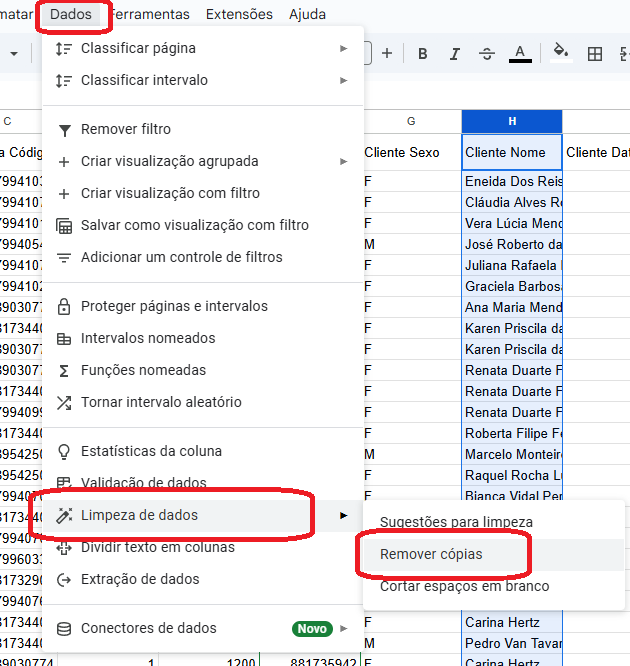

🔹 Antes de remover, podemos verificar se há duplicatas usando .duplicated().

In [ ]:
# Verifica se há linhas duplicadas (considerando todas as colunas)
df_receitas.duplicated().sum()

np.int64(0)

In [ ]:
# Exibir apenas as linhas duplicadas
df_receitas[df_receitas.duplicated()]

,atendimento_id,data_lancamento,receita_codigo,venda_quantidade,venda_valor,cliente_id,cliente_sexo,cliente_nascimento_data,cliente_origem,profissional_especialidade,pagamento_data,pagamento_forma


🔹 Após verificar, é possível remover. Consideremos remover duplicadas da tabela Dimensão (Lembra disso?).

In [ ]:
df_receitas_tipo.columns

Index(['Código', 'Categoria', 'Nome', 'Imposto', 'Valor Sugerido',
       'Custo Unitário', 'Porcentagem Clínica'],
      dtype='object')

In [ ]:
df_receitas_tipo.shape

(374, 7)

In [ ]:
# Remover duplicatas e manter apenas a primeira ocorrência
df_receitas_tipo = df_receitas_tipo.drop_duplicates()

In [ ]:
df_receitas_tipo.shape

(374, 7)

🔹 Mas, nesse caso, queremos remover apenas as duplicadas considerando o atributo código, que é a nossa chave primária (Lembra disso?)

In [ ]:
# Remover duplicatas considerando apenas a coluna "cliente_id"
df_receitas_tipo = df_receitas_tipo.drop_duplicates(subset=["Código"])

🔹 Você ainda pode passar outros parâmetros super interessantes para manipulação de dados, por exemplo, o parâmetro keep, para manter ocorrências condicionais. Veja a documentação (sempre consulte-a!)

In [ ]:
# Mantendo apenas a última ocorrência
df_receitas_tipo = df_receitas_tipo.drop_duplicates(subset=["Código"], keep="last")

[Clique para acessar a documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)